<a href="https://colab.research.google.com/github/tinypenguin-Bang/Machine-Deep-Learning-HW/blob/main/2021251496_%EB%B0%A9%EC%A3%BC%ED%98%95_5_2_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 지난 4-2 과제 내용에 연계하여 진행하겠습니다.

In [2]:
# 라이브러리 선언 + 구글 드라이브 마운트
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
# image 압축파일 다운로드 및 압축해제
fig_zip = '/content/drive/MyDrive/Colab Notebooks/Food.zip'
# zip파일 압축해제
with zipfile.ZipFile(fig_zip, 'r') as fig_d:
# 드라이브 내 fig폴더에 압축 해제
    fig_d.extractall('drive/MyDrive/fig')
fig_d.close()

KeyboardInterrupt: ignored

In [3]:
data_dir = '/content/drive/MyDrive/fig' # 이미지 크기 지정
img_height = 150
img_width = 150

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory( # 학습 데이터
  data_dir+'/training',    
  image_size=(img_height, img_width))

Found 9866 files belonging to 11 classes.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory( # 검증 데이터
  data_dir+'/validation',    
  image_size=(img_height, img_width))

Found 3430 files belonging to 11 classes.


In [6]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(  # 테스트 데이터
  data_dir+'/evaluation',    
  image_size=(img_height, img_width))

Found 3347 files belonging to 11 classes.


In [7]:
from tensorflow.keras.applications import EfficientNetB0    # EfficientNet 가져오기
eff_model = EfficientNetB0(weights = 'imagenet',include_top=False, input_shape=(150,150,3))

16719872/16705208 [==============================] - 0s 0us/step


In [8]:
eff_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 150, 150, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 150, 150, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 151, 151, 3)  0           ['normalization[0][0

In [9]:
class_names = train_ds.class_names  # 클래스 이름 로드
print(class_names)

['Bread', 'Dairy product', 'Dessert', 'Egg', 'Fried food', 'Meat', 'Noodles-Pasta', 'Rice', 'Seafood', 'Soup', 'Vegetable-Fruit']


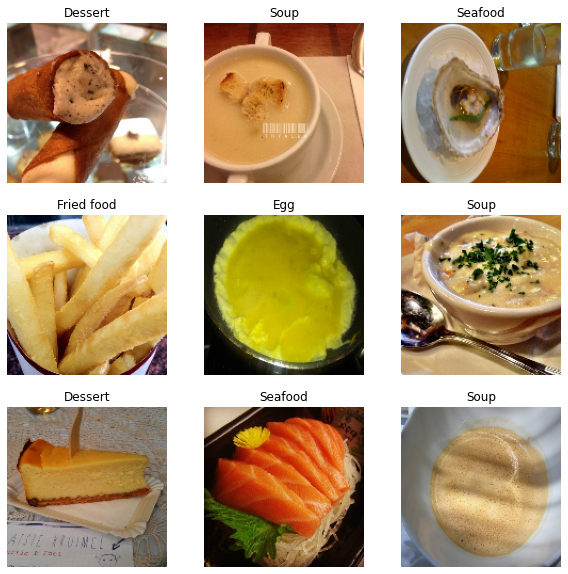

In [10]:
plt.figure(figsize=(10, 10))    # 라벨, 이미지 확인
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
eff_model.trainable = False

In [12]:
eff_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 150, 150, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 150, 150, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 151, 151, 3)  0           ['normalization[0][0

In [13]:
from tensorflow.keras import Sequential, Model, layers
tr_model = Sequential()

In [14]:
tr_model.add(eff_model)

In [15]:
tr_model.add(layers.Flatten())      # Classification을 위한 레이어 추가
tr_model.add(layers.Dense(256,activation='relu'))
tr_model.add(layers.Dropout(0.5))
tr_model.add(layers.Dense(11,activation='softmax'))

tr_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 5, 5, 1280)       4049571   
                                                                 
 flatten (Flatten)           (None, 32000)             0         
                                                                 
 dense (Dense)               (None, 256)               8192256   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 11)                2827      
                                                                 
Total params: 12,244,654
Trainable params: 8,195,083
Non-trainable params: 4,049,571
_________________________________________________________________


In [16]:
tr_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [17]:
# 과도학습 방지용 callback 추가
checkpoint_path = '/tmp/checkpoint/models'
checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_best_only=True)

In [ ]:
# train dataset을 널어주면 배치단위로 데이터가 넘어가면서 학습 [4-2 과제 때 사용한 모델]
history = tr_model.fit(
  train_ds,  
  validation_data=val_ds,
  epochs=10,
  callbacks = checkpoint
)

Epoch 1/10
309/309 [==============================] - 2561s 8s/step - loss: 1.2729 - acc: 0.6441 - val_loss: 0.7360 - val_acc: 0.7758
Epoch 2/10
309/309 [==============================] - 102s 327ms/step - loss: 0.7608 - acc: 0.7626 - val_loss: 0.6667 - val_acc: 0.7994
Epoch 3/10
309/309 [==============================] - 100s 319ms/step - loss: 0.6164 - acc: 0.8083 - val_loss: 0.6529 - val_acc: 0.8073
Epoch 4/10
309/309 [==============================] - 54s 170ms/step - loss: 0.4785 - acc: 0.8467 - val_loss: 0.6795 - val_acc: 0.8227
Epoch 5/10
309/309 [==============================] - 56s 179ms/step - loss: 0.4201 - acc: 0.8608 - val_loss: 0.7031 - val_acc: 0.8178
Epoch 6/10
309/309 [==============================] - 60s 190ms/step - loss: 0.4037 - acc: 0.8710 - val_loss: 0.7422 - val_acc: 0.8213
Epoch 7/10
309/309 [==============================] - 56s 177ms/step - loss: 0.3766 - acc: 0.8828 - val_loss: 0.7443 - val_acc: 0.8213
Epoch 8/10
309/309 [==============================] - 

In [19]:
eff_model.trainable = True

# 기본 모델에 몇 개의 층이 있는지 확인 합니다.
print("Number of layers in the base model: ", len(eff_model.layers))

Number of layers in the base model:  237


In [20]:
# 해당 층 이후부터 미세 조정
fine_tune_at = 200

# `fine_tune_at` 층 이전의 모든 층을 고정
for layer in eff_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [21]:
tr_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
tr_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 5, 5, 1280)       4049571   
                                                                 
 flatten (Flatten)           (None, 32000)             0         
                                                                 
 dense (Dense)               (None, 256)               8192256   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 11)                2827      
                                                                 
Total params: 12,244,654
Trainable params: 10,190,443
Non-trainable params: 2,054,211
_________________________________________________________________


In [22]:
# train dataset을 널어주면 배치단위로 데이터가 넘어가면서 학습
history = tr_model.fit(
  train_ds,  
  validation_data=val_ds,
  epochs=10,
  callbacks = checkpoint
)

Epoch 1/10
309/309 [==============================] - 1260s 4s/step - loss: 1.1914 - acc: 0.6736 - val_loss: 0.7687 - val_acc: 0.8064
Epoch 2/10
309/309 [==============================] - 106s 341ms/step - loss: 0.6670 - acc: 0.8074 - val_loss: 0.6514 - val_acc: 0.8318
Epoch 3/10
309/309 [==============================] - 58s 184ms/step - loss: 0.4944 - acc: 0.8504 - val_loss: 0.8269 - val_acc: 0.8338
Epoch 4/10
309/309 [==============================] - 58s 185ms/step - loss: 0.4187 - acc: 0.8768 - val_loss: 0.7379 - val_acc: 0.8452
Epoch 5/10
309/309 [==============================] - 57s 182ms/step - loss: 0.3991 - acc: 0.8886 - val_loss: 0.8989 - val_acc: 0.8324
Epoch 6/10
309/309 [==============================] - 57s 181ms/step - loss: 0.3558 - acc: 0.9005 - val_loss: 0.9081 - val_acc: 0.8429
Epoch 7/10
309/309 [==============================] - 58s 184ms/step - loss: 0.2970 - acc: 0.9189 - val_loss: 0.7271 - val_acc: 0.8551
Epoch 8/10
309/309 [==============================] - 5

# Fine Tuning(미세조정)을 통해 Validation accuracy값이 0.8347에서 0.8490으로 증가함을 확인하였습니다.

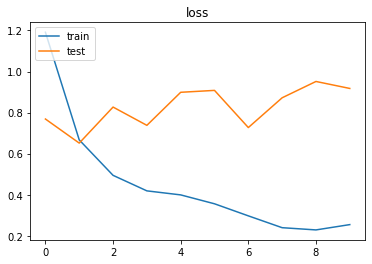

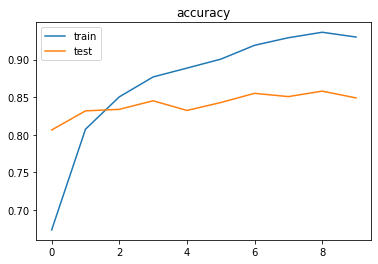

In [23]:
  # epoch별 손실, 정확도 확인
  plt.figure()
  plt.title('loss')
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  plt.figure()
  plt.title('accuracy')
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.legend(['train', 'test'], loc='upper left')

In [24]:
tr_model.metrics_names

['loss', 'acc']

In [25]:
# 모델 저장하기
tr_model.save('/content/drive/MyDrive/fig/Fine_Tuning_Food_EfficientNet_tl.h5')